# Training Sub-Image

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import pickle
import matplotlib.patches as patches

%matplotlib widget

## Import next quantum

In [2]:
with open('unlabeled_data/sources_0.obj', 'rb') as f:
    sources = pickle.load(f)

## Sub-image batch widget

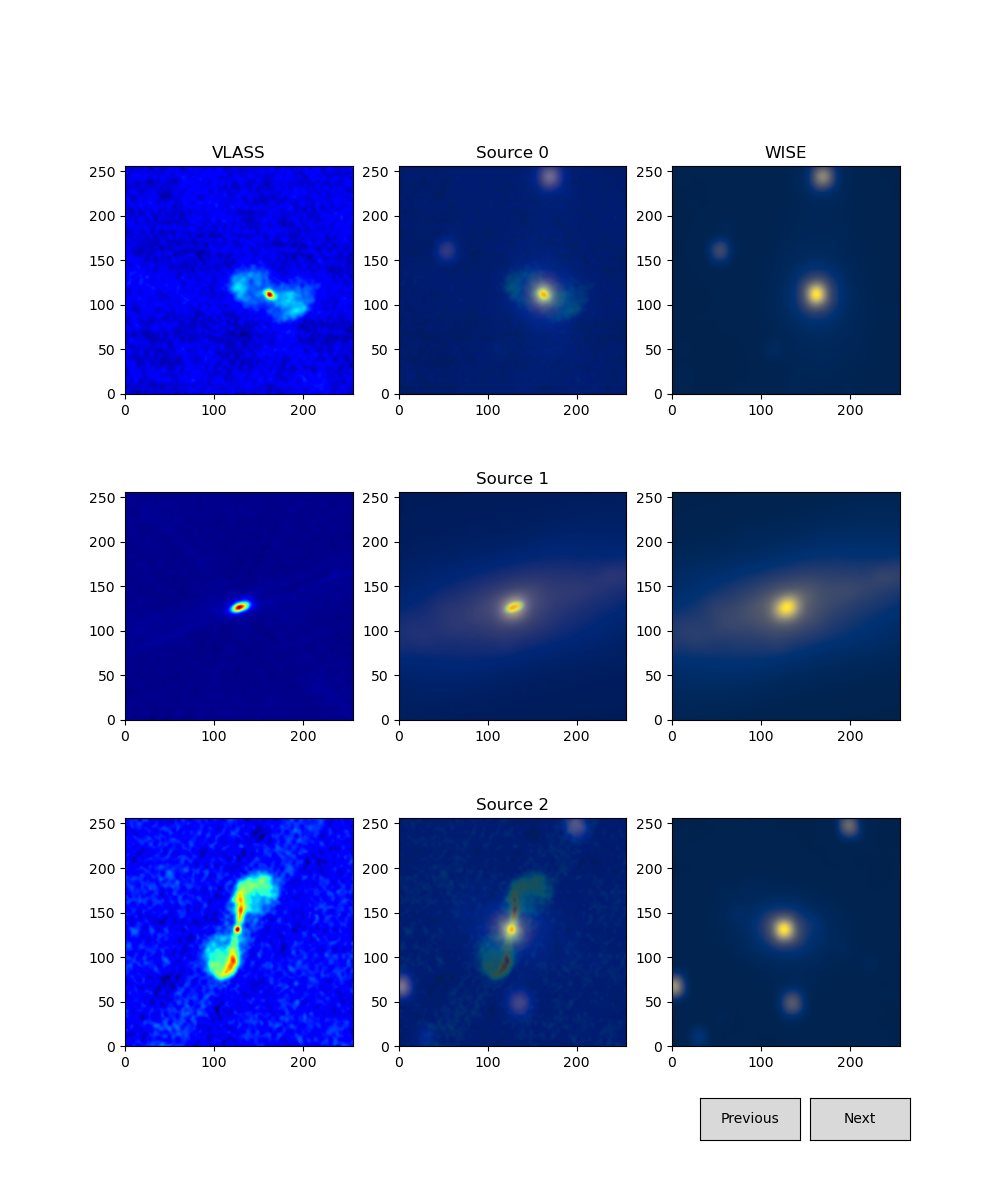

In [3]:
plt.close()

sourceLength = len(sources)
nSources = 3

fig, ax = plt.subplots(nSources, 3, figsize=(10, 12))
ax[0][0].set_title('VLASS')
ax[0][1].set_title('VLASS + WISE')
ax[0][2].set_title('WISE')

class Index:
    ind = 0

    def next(self, event):
        for i in range(nSources):
            sources[i+self.ind].setAllCoords(int(ax[i][1].get_xlim()[0]), int(ax[i][1].get_xlim()[1]), 
                int(ax[i][1].get_ylim()[0]), int(ax[i][1].get_ylim()[1]))

        self.ind += nSources
        i = self.ind % sourceLength
        self.showFigures()
        plt.draw()

    def prev(self, event):
        self.ind -= nSources
        i = self.ind % sourceLength
        self.showFigures()
        plt.draw()

    def showFigures(self):
        for i in range(nSources):
            ax[i][0].imshow(sources[i+self.ind].images[0].data, origin='lower', cmap='jet')
            ax[i][0].set_xlim(0, 256); ax[i][0].set_ylim(0, 256)

            ax[i][1].title.set_text('Source '+str(i+self.ind))
            ax[i][1].imshow(sources[i+self.ind].images[1].data, origin='lower', cmap='cividis')
            ax[i][1].imshow(sources[i+self.ind].images[0].data, origin='lower', cmap='jet', alpha=0.2)
            ax[i][1].set_xlim(0, 256); ax[i][1].set_ylim(0, 256)

            ax[i][2].imshow(sources[i+self.ind].images[1].data, origin='lower', cmap='cividis')
            ax[i][2].set_xlim(0, 256); ax[i][2].set_ylim(0, 256)

callback = Index()
callback.showFigures()
axprev = fig.add_axes([0.7, 0.05, 0.1, 0.035])
axnext = fig.add_axes([0.81, 0.05, 0.1, 0.035])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()

## Save sub-image bounds to fits header and training data file

In [4]:
with open('labeled_data/sources_0.obj', 'wb') as f:
        pickle.dump(sources, f)

## Sub-image in widget

In [ ]:
plt.close()
fig, ax = plt.subplots(len(sources), 3, figsize=(10, len(sources)*4))
ax[0][0].set_title('VLASS')
ax[0][1].set_title('VLASS + WISE')
ax[0][2].set_title('WISE')

for i in range(len(sources)):
    ax[i][0].imshow(sources[i].images[0].data, origin='lower', cmap='jet')
    # ax[i][0].set_xlim(0, 128); ax[i][0].set_ylim(0, 128)

    ax[i][1].imshow(sources[i].images[1].data, origin='lower', cmap='cividis')
    ax[i][1].imshow(sources[i].images[0].data, origin='lower', cmap='jet', alpha=0.4)
    # ax[i][1].set_xlim(0, 128); ax[i][1].set_ylim(0, 128)

    ax[i][2].imshow(sources[i].images[1].data, origin='lower', cmap='cividis')
    # ax[i][2].set_xlim(0, 128); ax[i][2].set_ylim(0, 128)

plt.show()

## Test coordinate saving

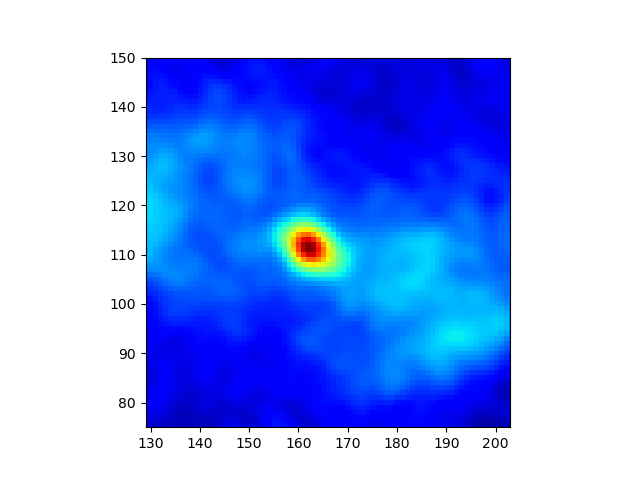

In [2]:
with open('labeled_data/sources_0.obj', 'rb') as f:
    sources = pickle.load(f)

plt.close()
plt.imshow(sources[0].images[0].data, origin='lower', cmap='jet')
plt.xlim(sources[0].images[0].x0, sources[0].images[0].x1)
plt.ylim(sources[0].images[0].y0, sources[0].images[0].y1)
plt.show()

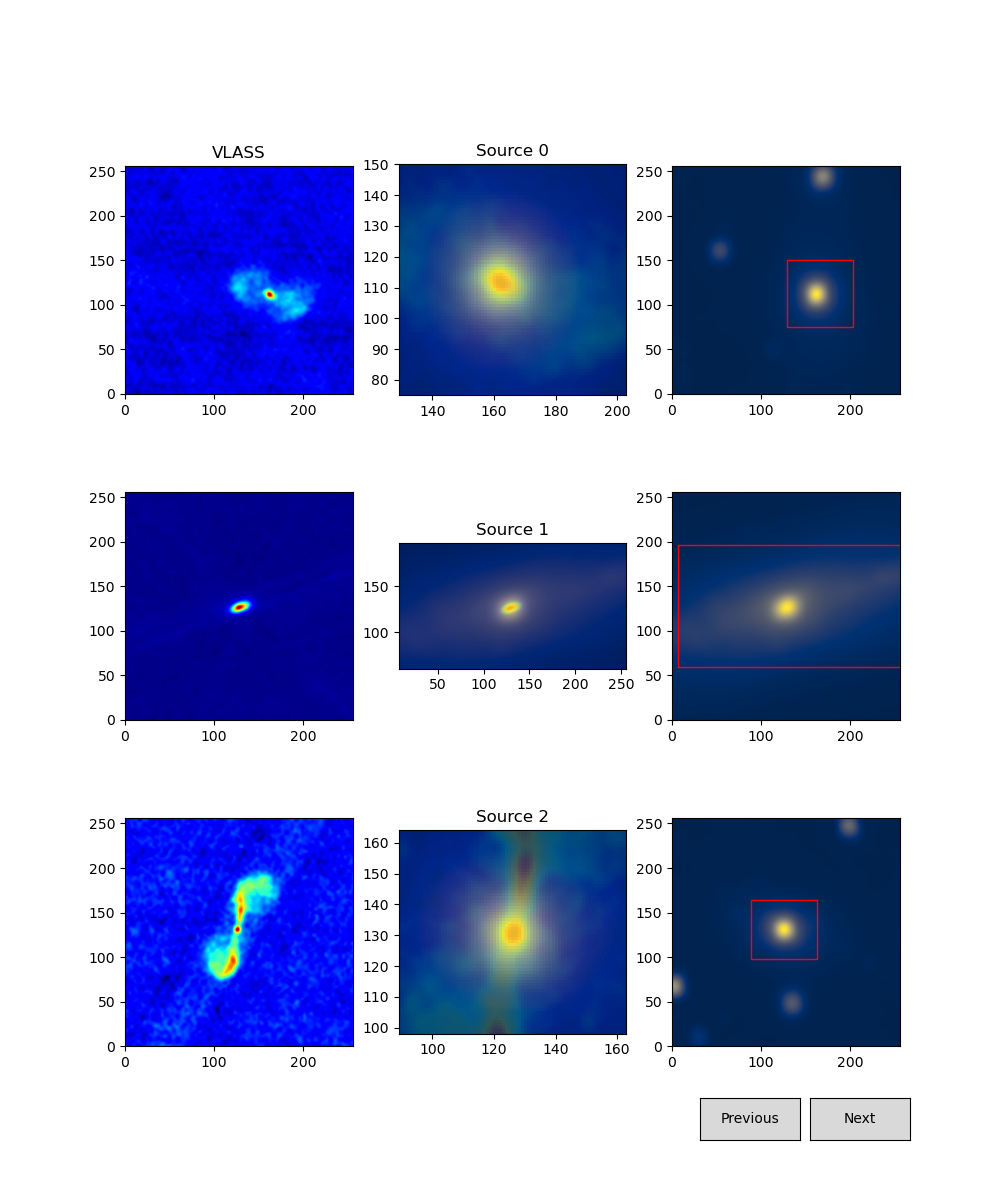

In [17]:
plt.close()

sourceLength = len(sources)
nSources = 3

fig, ax = plt.subplots(nSources, 3, figsize=(10, 12))
ax[0][0].set_title('VLASS')
ax[0][1].set_title('VLASS + WISE')
ax[0][2].set_title('WISE')

class Index:
    ind = 0

    def next(self, event):
        for i in range(nSources):
            sources[i+self.ind].setAllCoords(int(ax[i][1].get_xlim()[0]), int(ax[i][1].get_xlim()[1]), 
                int(ax[i][1].get_ylim()[0]), int(ax[i][1].get_ylim()[1]))

        self.ind += nSources
        i = self.ind % sourceLength
        self.showFigures()
        plt.draw()

    def prev(self, event):
        self.ind -= nSources
        i = self.ind % sourceLength
        self.showFigures()
        plt.draw()

    def showFigures(self):
        for i in range(nSources):
            (x0,x1) = (sources[i+self.ind].images[0].x0, sources[i+self.ind].images[0].x1)
            (y0,y1) = (sources[i+self.ind].images[0].y0, sources[i+self.ind].images[0].y1)
            ax[i][0].imshow(sources[i+self.ind].images[0].data, origin='lower', cmap='jet')
            ax[i][0].set_xlim(0, 256); ax[i][0].set_ylim(0, 256)

            ax[i][1].title.set_text('Source '+str(i+self.ind))
            ax[i][1].imshow(sources[i+self.ind].images[1].data, origin='lower', cmap='cividis')
            ax[i][1].imshow(sources[i+self.ind].images[0].data, origin='lower', cmap='jet', alpha=0.2)
            ax[i][1].set_xlim(x0, x1)
            ax[i][1].set_ylim(y0, y1)

            ax[i][2].cla()
            ax[i][2].imshow(sources[i+self.ind].images[1].data, origin='lower', cmap='cividis')
            ax[i][2].set_xlim(0, 256); ax[i][2].set_ylim(0, 256)
            
            # Create a Rectangle patch
            rect = patches.Rectangle((x0, y0), x1-x0, y1-y0, linewidth=1, edgecolor='r', facecolor='none')

            # Add the patch to the final image
            ax[i][2].add_patch(rect)

callback = Index()
callback.showFigures()
axprev = fig.add_axes([0.7, 0.05, 0.1, 0.035])
axnext = fig.add_axes([0.81, 0.05, 0.1, 0.035])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()

In [5]:
print(sources[0].images[0].x0, sources[0].images[0].x1)

129 203
